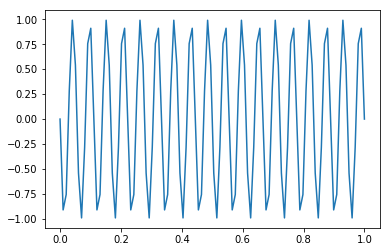

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

def sinsig(n, a, f, fs, time=1.0, phi = 0):
    x = np.linspace(0, time, n)
    x = x[:100]
    y = a * np.sin(2 * f * np.pi * x + phi)
    return x, y

f, fs, a, n, time = 18000, 48000, 1.0, 100, 0.0025

x, pulse = sinsig(n, a, f, fs)
plt.plot(x, pulse)

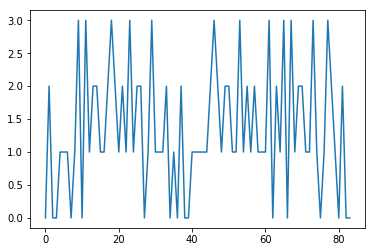

In [2]:
delta = 150
pause = [np.zeros((1, i * delta), dtype=np.float) for i in range(1, 5)]

from binascii import hexlify
my_str = ' Tsinghua University '
def encode(x):
    info = ''.join([bin(ord(ch))[2:].zfill(8) for ch in x])
    arr = [int(info[2 * i:2 * i + 2], 2) for i in range(len(info) // 2)]
    arr = np.array(arr, dtype=np.short)
    return arr
arr = encode(my_str)
plt.plot(arr)

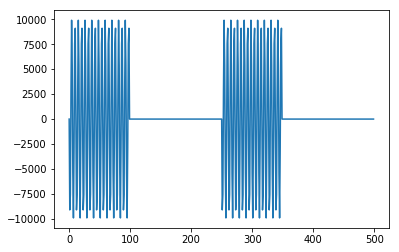

In [7]:
def syth(pulse, arr):
    sig = [np.append(pulse, pause[i]) for i in arr]
    sig = np.concatenate(sig, axis=0)
    sig = np.append(pause[3], sig)
    return sig
sig = syth(pulse, arr)
sigout = sig * 10000
sigout = sigout.astype(np.short)
x = np.linspace(0, 1, len(sigout))
plt.plot(sigout[-500:])

In [8]:
from scipy.io import wavfile
def writewav(data, filename, fs):
    wavfile.write(filename, fs, data)
writewav(sigout, 'sample.wav', fs)